In [61]:
import os
import numpy as np
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
from scipy.io import loadmat
import biosppy

In [55]:
folder_path = "Training_PTB/"

ecg_data = []
labels = []

fixed_length = 1000

for i in range(1, 550):
  file_name = f"S{i:04d}"

  hea_file = os.path.join(folder_path, f"{file_name}.hea")
  mat_file = os.path.join(folder_path, f"{file_name}.mat")

  if (os.path.exists(hea_file) and os.path.exists(mat_file)):
    try:
      mat_data = loadmat(mat_file)
      ecg_signal = mat_data['val']

      record = wfdb.rdrecord(os.path.join(folder_path, file_name))

      fs = record.fs
      signals = record.p_signal

      signal = signals[:, 0]

      if len(signal) > fixed_length:
        signal = signal[:fixed_length]
      elif len(signal) < fixed_length:
        signal = np.pad(signal , (0, fixed_length - len(signal)), 'constant')

      label = file_name

      ecg_data.append(signal)
      labels.append(label)
    except Exception as e:
      print(f"Error processing {file_name}: {e}")

ecg_data = np.array(ecg_data)

df = pd.DataFrame(ecg_data)

df['label'] = labels

df

df.to_csv("ptb_dataset.csv", index=False)

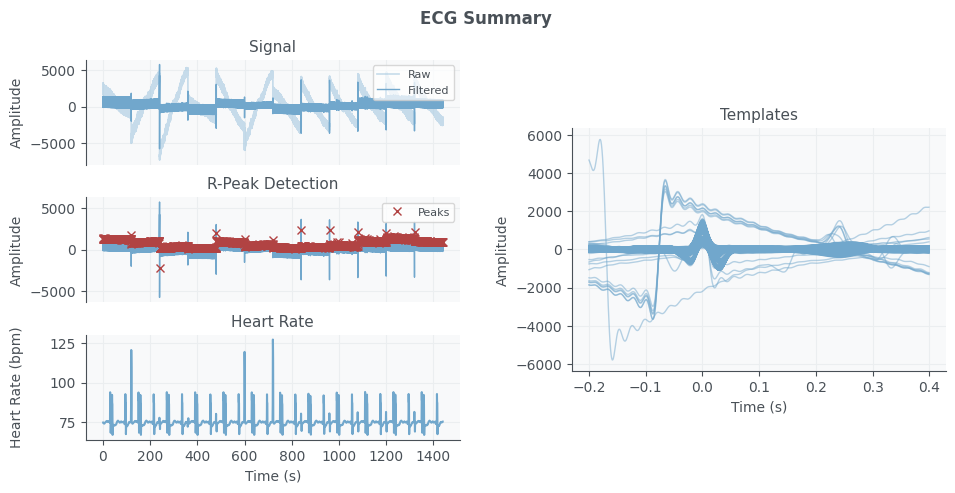

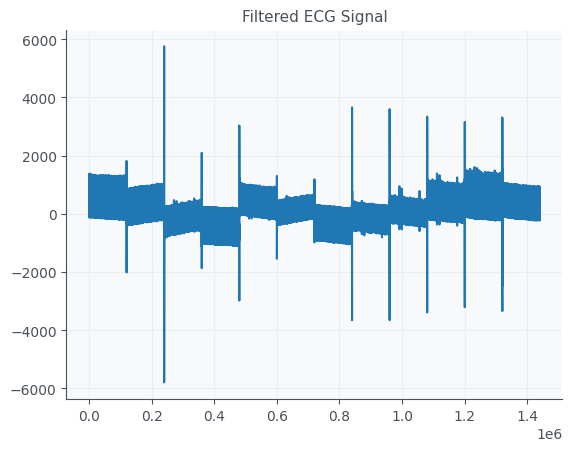

In [67]:
ecg_signal = np.ravel(ecg_signal)
ecg_signal = np.nan_to_num(ecg_signal)

ecg = biosppy.signals.ecg.ecg(signal=ecg_signal, sampling_rate=1000, show=True)

ecg_signal_processed = ecg['filtered']
plt.plot(ecg_signal_processed)
plt.title("Filtered ECG Signal")
plt.show()

In [20]:
# Check the shape of the signals
print(f"Shape of the signals: {signals.shape}")

# Check a sample to see if it contains the expected signal data
print(f"First sample signals (first 10 samples for all leads): {signals[0, :10]}")


Shape of the signals: (120012, 12)
First sample signals (first 10 samples for all leads): [ 0.0009115 -0.002382  -0.003293   0.000735   0.0021025 -0.0028375
  0.001176   0.0018595  0.0018235  0.001766 ]


In [45]:
ecg_signal = df.iloc[0, :-1].values
ecg_signal

array([-0.0001225, -0.0001215, -0.000121, -0.0001205, -0.000116,
       -0.000113, -0.0001125, -0.0001175, -0.0001175, -0.000112,
       -0.0001105, -0.0001135, -0.000116, -0.000119, -0.0001225,
       -0.0001185, -0.000112, -0.0001135, -0.0001135, -0.000114,
       -0.0001165, -0.000113, -0.000113, -0.0001055, -0.000107, -0.000112,
       -0.00011, -0.000108, -0.0001, -9.85e-05, -9.85e-05, -0.0001045,
       -0.0001195, -0.000126, -0.0001195, -0.0001135, -0.0001175,
       -0.0001275, -0.000124, -0.0001155, -0.000115, -0.00011, -0.0001075,
       -0.0001075, -0.000114, -0.0001125, -0.000107, -0.0001005,
       -0.0001035, -0.000114, -0.0001095, -0.000108, -0.000108, -0.000111,
       -0.000116, -0.000114, -0.0001095, -0.0001105, -0.0001135,
       -0.0001135, -0.0001145, -0.000116, -0.000118, -0.000112, -0.000107,
       -0.000108, -0.0001055, -0.0001065, -0.0001095, -0.000106,
       -0.000102, -0.0001005, -0.0001025, -0.0001155, -0.0001165,
       -0.000109, -0.000111, -0.0001125, -

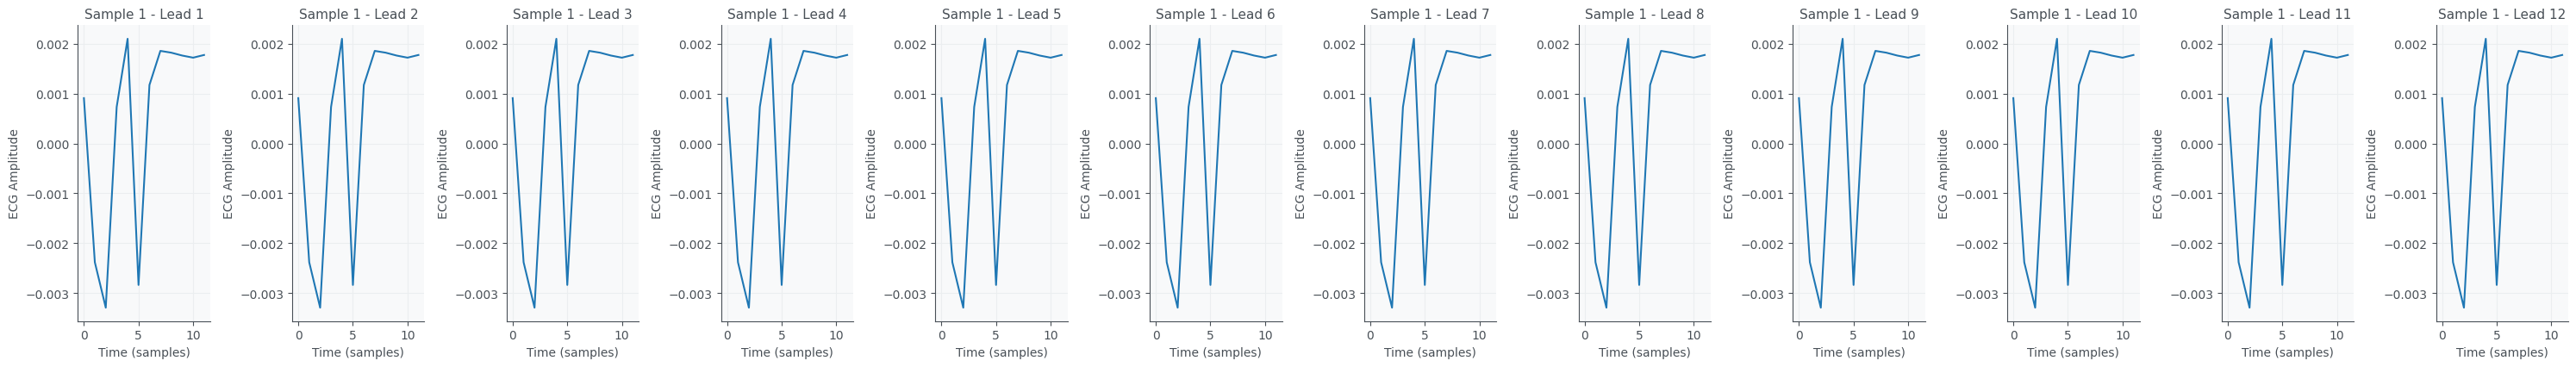

In [70]:
ecg_signal = df.iloc[0, :-1].values
time = np.arange(len(ecg_signal))

# Let's plot the first 5 samples and all leads
plt.figure(figsize=(30, 20))

for i in range(1):  # First 5 samples
    for j in range(signals.shape[1]):  # Iterate through each lead (columns in signals)
        ecg_signal = signals[i, :]  # Get the entire ECG signal for the i-th sample
        lead_signal = ecg_signal  # The signal for the i-th sample (across all leads)

        plt.subplot(5, signals.shape[1], i * signals.shape[1] + j + 1)
        plt.plot(np.arange(len(lead_signal)), lead_signal)  # Plot the signal
        plt.title(f"Sample {i + 1} - Lead {j + 1}")
        plt.xlabel("Time (samples)")
        plt.ylabel("ECG Amplitude")
        plt.grid(True)

plt.tight_layout()
plt.show()